In [119]:
import numpy as np   
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

%matplotlib inline

In [120]:
df = pd.read_csv('A:\Data/IMDB Dataset.csv')

In [121]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [122]:
df.shape

(50000, 2)

In [123]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [124]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

##### Имеется 2 столбца-описание и отзыв,мнение. Отзыв - это таргет,что надо предсказать.
##### Фрейм имеет равное количество положительных и отрицательных отзывов
##### Возьму любой отзыв и посмотрю как можно его очистить.

In [125]:
review = df['review'].loc[7]
review

"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air."

In [126]:
len(review)

934

##### На первый взгляд взятый текст не содержит HTML теги,но на всякий случай почищу

In [127]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(review, "html.parser")
review = soup.get_text()
review

"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air."

##### С помощью регулярных выражений удалю все знаки кроме букв и цифр

In [128]:
import re
review = re.sub('[^a-zA-Z\d]', ' ', review)
review

'This show was an amazing  fresh   innovative idea in the 70 s when it first aired  The first 7 or 8 years were brilliant  but things dropped off after that  By 1990  the show was not really funny anymore  and it s continued its decline further to the complete waste of time it is today It s truly disgraceful how far this show has fallen  The writing is painfully bad  the performances are almost as bad   if not for the mildly entertaining respite of the guest hosts  this show probably wouldn t still be on the air  I find it so hard to believe that the same creator that hand selected the original cast also chose the band of hacks that followed  How can one recognize such brilliance and then see fit to replace it with such mediocrity  I felt I must give 2 stars out of respect for the original cast that made this show such a huge success  As it is now  the show is just awful  I can t believe it s still on the air '

##### Приведу текст к нижнему регистру

In [129]:
review = review.lower()
review

'this show was an amazing  fresh   innovative idea in the 70 s when it first aired  the first 7 or 8 years were brilliant  but things dropped off after that  by 1990  the show was not really funny anymore  and it s continued its decline further to the complete waste of time it is today it s truly disgraceful how far this show has fallen  the writing is painfully bad  the performances are almost as bad   if not for the mildly entertaining respite of the guest hosts  this show probably wouldn t still be on the air  i find it so hard to believe that the same creator that hand selected the original cast also chose the band of hacks that followed  how can one recognize such brilliance and then see fit to replace it with such mediocrity  i felt i must give 2 stars out of respect for the original cast that made this show such a huge success  as it is now  the show is just awful  i can t believe it s still on the air '

##### Для работы со стоп словами разделю текст

In [130]:
review = review.split()
review

['this',
 'show',
 'was',
 'an',
 'amazing',
 'fresh',
 'innovative',
 'idea',
 'in',
 'the',
 '70',
 's',
 'when',
 'it',
 'first',
 'aired',
 'the',
 'first',
 '7',
 'or',
 '8',
 'years',
 'were',
 'brilliant',
 'but',
 'things',
 'dropped',
 'off',
 'after',
 'that',
 'by',
 '1990',
 'the',
 'show',
 'was',
 'not',
 'really',
 'funny',
 'anymore',
 'and',
 'it',
 's',
 'continued',
 'its',
 'decline',
 'further',
 'to',
 'the',
 'complete',
 'waste',
 'of',
 'time',
 'it',
 'is',
 'today',
 'it',
 's',
 'truly',
 'disgraceful',
 'how',
 'far',
 'this',
 'show',
 'has',
 'fallen',
 'the',
 'writing',
 'is',
 'painfully',
 'bad',
 'the',
 'performances',
 'are',
 'almost',
 'as',
 'bad',
 'if',
 'not',
 'for',
 'the',
 'mildly',
 'entertaining',
 'respite',
 'of',
 'the',
 'guest',
 'hosts',
 'this',
 'show',
 'probably',
 'wouldn',
 't',
 'still',
 'be',
 'on',
 'the',
 'air',
 'i',
 'find',
 'it',
 'so',
 'hard',
 'to',
 'believe',
 'that',
 'the',
 'same',
 'creator',
 'that',
 'ha

##### Удаляю стоп слова с помощью библиотеки NLTK

In [131]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

review = [word for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\александр\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['show',
 'amazing',
 'fresh',
 'innovative',
 'idea',
 '70',
 'first',
 'aired',
 'first',
 '7',
 '8',
 'years',
 'brilliant',
 'things',
 'dropped',
 '1990',
 'show',
 'really',
 'funny',
 'anymore',
 'continued',
 'decline',
 'complete',
 'waste',
 'time',
 'today',
 'truly',
 'disgraceful',
 'far',
 'show',
 'fallen',
 'writing',
 'painfully',
 'bad',
 'performances',
 'almost',
 'bad',
 'mildly',
 'entertaining',
 'respite',
 'guest',
 'hosts',
 'show',
 'probably',
 'still',
 'air',
 'find',
 'hard',
 'believe',
 'creator',
 'hand',
 'selected',
 'original',
 'cast',
 'also',
 'chose',
 'band',
 'hacks',
 'followed',
 'one',
 'recognize',
 'brilliance',
 'see',
 'fit',
 'replace',
 'mediocrity',
 'felt',
 'must',
 'give',
 '2',
 'stars',
 'respect',
 'original',
 'cast',
 'made',
 'show',
 'huge',
 'success',
 'show',
 'awful',
 'believe',
 'still',
 'air']

##### Сделаю стемматизацию и лемматизацию. Посмотрю что лучше сработает,то и оставлю

In [132]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
review_s = [ps.stem(word) for word in review]
review_s

['show',
 'amaz',
 'fresh',
 'innov',
 'idea',
 '70',
 'first',
 'air',
 'first',
 '7',
 '8',
 'year',
 'brilliant',
 'thing',
 'drop',
 '1990',
 'show',
 'realli',
 'funni',
 'anymor',
 'continu',
 'declin',
 'complet',
 'wast',
 'time',
 'today',
 'truli',
 'disgrac',
 'far',
 'show',
 'fallen',
 'write',
 'pain',
 'bad',
 'perform',
 'almost',
 'bad',
 'mildli',
 'entertain',
 'respit',
 'guest',
 'host',
 'show',
 'probabl',
 'still',
 'air',
 'find',
 'hard',
 'believ',
 'creator',
 'hand',
 'select',
 'origin',
 'cast',
 'also',
 'chose',
 'band',
 'hack',
 'follow',
 'one',
 'recogn',
 'brillianc',
 'see',
 'fit',
 'replac',
 'mediocr',
 'felt',
 'must',
 'give',
 '2',
 'star',
 'respect',
 'origin',
 'cast',
 'made',
 'show',
 'huge',
 'success',
 'show',
 'aw',
 'believ',
 'still',
 'air']

In [133]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
review = [lem.lemmatize(word) for word in review]
review

['show',
 'amazing',
 'fresh',
 'innovative',
 'idea',
 '70',
 'first',
 'aired',
 'first',
 '7',
 '8',
 'year',
 'brilliant',
 'thing',
 'dropped',
 '1990',
 'show',
 'really',
 'funny',
 'anymore',
 'continued',
 'decline',
 'complete',
 'waste',
 'time',
 'today',
 'truly',
 'disgraceful',
 'far',
 'show',
 'fallen',
 'writing',
 'painfully',
 'bad',
 'performance',
 'almost',
 'bad',
 'mildly',
 'entertaining',
 'respite',
 'guest',
 'host',
 'show',
 'probably',
 'still',
 'air',
 'find',
 'hard',
 'believe',
 'creator',
 'hand',
 'selected',
 'original',
 'cast',
 'also',
 'chose',
 'band',
 'hack',
 'followed',
 'one',
 'recognize',
 'brilliance',
 'see',
 'fit',
 'replace',
 'mediocrity',
 'felt',
 'must',
 'give',
 '2',
 'star',
 'respect',
 'original',
 'cast',
 'made',
 'show',
 'huge',
 'success',
 'show',
 'awful',
 'believe',
 'still',
 'air']

##### Лемматизация лучше обработала данный текст,использую её
##### Объединю слова в обработанный текст

In [134]:
review = ' '.join(review)
review

'show amazing fresh innovative idea 70 first aired first 7 8 year brilliant thing dropped 1990 show really funny anymore continued decline complete waste time today truly disgraceful far show fallen writing painfully bad performance almost bad mildly entertaining respite guest host show probably still air find hard believe creator hand selected original cast also chose band hack followed one recognize brilliance see fit replace mediocrity felt must give 2 star respect original cast made show huge success show awful believe still air'

In [135]:
len(review)

537

##### Было 934 знака,стало-537

#### Перевожу этот текст в матричную форму

In [136]:
docs = []
docs.append(review)

In [137]:
docs

['show amazing fresh innovative idea 70 first aired first 7 8 year brilliant thing dropped 1990 show really funny anymore continued decline complete waste time today truly disgraceful far show fallen writing painfully bad performance almost bad mildly entertaining respite guest host show probably still air find hard believe creator hand selected original cast also chose band hack followed one recognize brilliance see fit replace mediocrity felt must give 2 star respect original cast made show huge success show awful believe still air']

#### На примере одного текста проверю как работает TD-IDF преобразование 

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
review_vect = vect.fit_transform(docs)

review_vect.toarray()

array([[0.08980265, 0.08980265, 0.1796053 , 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.1796053 ,
        0.08980265, 0.1796053 , 0.08980265, 0.08980265, 0.1796053 ,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.1796053 , 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.1796053 , 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.53881591, 0.08980265, 0.1796053 ,
        0.08980265, 0.08980265, 0.08980265, 0.08980265, 0.08980265,
        0.08980265, 0.08980265, 0.08980265]])

#### Применю все эти методы ко всему датафрейму.

In [139]:
stop = stopwords.words('english')

In [140]:
def df_Lem(text):
    return ' '.join([lem.lemmatize(word) for word in text.split(' ') if word not in stop])

In [143]:
df.review = df.review.apply(lambda x: df_Lem(x))

In [144]:
df.sentiment = df.sentiment.replace('positive', 1)
df.sentiment = df.sentiment.replace('negative', 0)

In [145]:
X = df.review
y = df.sentiment

In [146]:
y.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

#### Разбиваю на train,test

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [151]:
y_train.value_counts()

0    17589
1    17411
Name: sentiment, dtype: int64

#### Применяю TD-IDF преобразование "из коробки", с регуляризацией и единичными токенами

In [161]:
vect = TfidfVectorizer()

vect_train = vect.fit_transform(X_train)
vect_test = vect.transform(X_test)

vect_train.shape,vect_test.shape

((35000, 86081), (15000, 86081))

#### Поскольку целевая переменная в нашем случае дискретная(полож./отриц. отзыв),то воспользуюсь логистической регрессией

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_reg = LogisticRegression()

log_reg.fit(vect_train, y_train)

predict = log_reg.predict(vect_test)

In [90]:
log_reg.coef_.shape

(1, 3399)

#### Посмотрим что получилось

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict))
print("Accuracy: \n", accuracy_score(y_test, predict))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.87      0.84      0.86      7411
    Positive       0.85      0.88      0.87      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix: 
 [[6243 1168]
 [ 896 6693]]
Accuracy: 
 0.8624


#### Повторю,используя биграммы

In [168]:
vect1 = TfidfVectorizer(ngram_range=(2, 2))

vect_train1 = vect1.fit_transform(X_train)
vect_test1 = vect1.transform(X_test)

In [169]:
log_reg = LogisticRegression()

log_reg.fit(vect_train1, y_train)

predict1 = log_reg.predict(vect_test1)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(y_test, predict1,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict1))
print("Accuracy: \n", accuracy_score(y_test, predict1))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.87      0.86      0.86      7411
    Positive       0.86      0.87      0.87      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix: 
 [[6359 1052]
 [ 985 6604]]
Accuracy: 
 0.8642


#### Получилось хуже,чем "из коробки"
#### Сделаю то же самое,но без l2 регуляризации и использую единичные токены и биграммы
#### Отбрасываю n-грамы, встречающиеся в более чем 99.5%, и менее чем в 0.5% документов

In [171]:
vect2 = TfidfVectorizer(norm=None,ngram_range=(1, 2),max_df=0.995, min_df=0.005)


In [172]:
vect_train2 = vect2.fit_transform(X_train)
vect_test2 = vect2.transform(X_test)

In [180]:
log_reg = LogisticRegression()

log_reg.fit(vect_train2, y_train)

predict2 = log_reg.predict(vect_test2)

In [181]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(y_test, predict2,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(y_test, predict2))
print("Accuracy: \n", accuracy_score(y_test, predict2))

Classification Report: 
               precision    recall  f1-score   support

    Negative       0.86      0.87      0.87      7411
    Positive       0.87      0.86      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

Confusion Matrix: 
 [[6457  954]
 [1043 6546]]
Accuracy: 
 0.8668666666666667


#### Видно,что модели работают примерно одинаково.
#### Последняя чуть лучше,использую её

#### Делаю визуализацию коэффициентов.Возьму топ-50 слов

Text(0.5, 1.0, 'Negative')

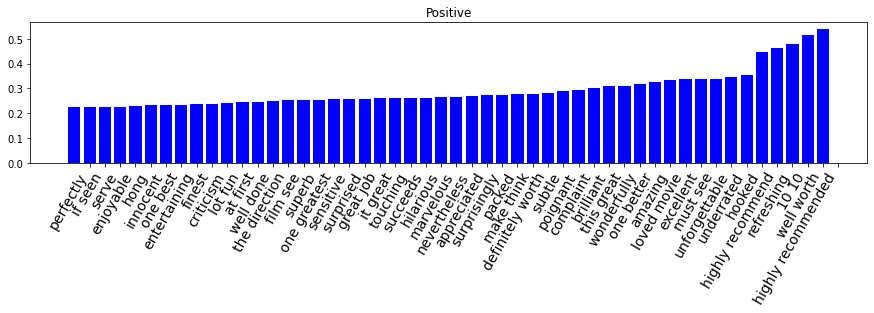

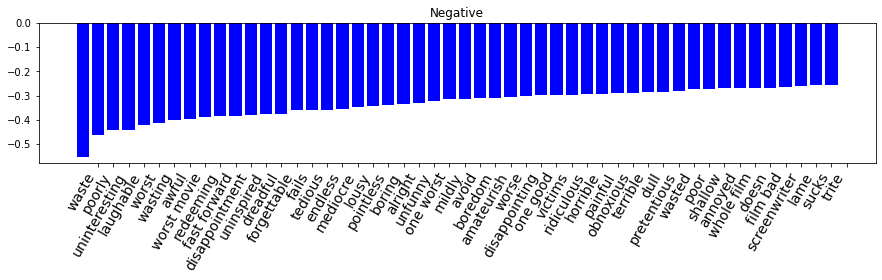

In [178]:
top_feat=50
feature_names = vect2.get_feature_names()
coef = log_reg.coef_[0,:]
coefficients = np.argsort(coef)[-top_feat:]
    
plt.figure(figsize=(15, 15))
plt.subplot(512)
colors = ["blue" for c in coef[coefficients]]
plt.bar(np.arange(top_feat), coef[coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + top_feat), 
               feature_names[coefficients], rotation=60, ha="right", fontsize=14);
plt.title('Positive')


coefficients = np.argsort(coef)[:top_feat]
    
plt.figure(figsize=(15, 15))
plt.subplot(513)
colors = ["blue" for c in coef[coefficients]]
plt.bar(np.arange(top_feat), coef[coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + top_feat), 
               feature_names[coefficients], rotation=60, ha="right", fontsize=14);
plt.title('Negative')

